# Example behavior and ophys data
The following example shows how to access behavioral data for a given recording session and how to align with corresponding neural data

The following assumes that the AllenSDK has been installed in your environment. If not, run:

    pip install allensdk


## Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

import allensdk.brain_observatory.behavior.behavior_project_cache as bpc

import allensdk
import pkg_resources
print('allensdk version 2.10.2 or higher is required, you have {} installed'.format(pkg_resources.get_distribution("allensdk").version))

/home/seungjaeryanlee/anaconda3/envs/nma-cn/lib/python3.8/site-packages/allensdk/brain_observatory/session_api_utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


allensdk version 2.10.2 or higher is required, you have 2.11.2 installed


In [15]:
# %matplotlib notebook
%matplotlib inline

## Make notebook use full screen width

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [7]:
my_cache_dir = "./allensdk_storage"

bc = bpc.VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=my_cache_dir)
          
experiment_table = bc.get_ophys_experiment_table()                          

ophys_session_table.csv: 100%|██████████| 165k/165k [00:00<00:00, 1.05MMB/s] 
behavior_session_table.csv: 100%|██████████| 885k/885k [00:00<00:00, 4.43MMB/s] 
ophys_experiment_table.csv: 100%|██████████| 336k/336k [00:00<00:00, 1.93MMB/s] 


## Look at a sample of the experiment table

In [8]:
experiment_table.sample(5)

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,ophys_session_id,behavior_session_id,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,,
885146787,MESO.1,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,451787,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,132.0,Slc17a7-IRES2-Cre,GCaMP6f,4.0,2,2.0,5,884613038,884808160,1018027561,VisualBehaviorMultiscope,225,VISl,2019-06-11 11:43:04.000000,OPHYS_4_images_B,1085674009
962471847,CAM2P.5,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,476067,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",F,132.0,Slc17a7-IRES2-Cre,GCaMP6f,4.0,0,0.0,6,961666386,962191834,947838486,VisualBehaviorTask1B,175,VISp,2019-10-07 15:19:36.000000,OPHYS_4_images_A,962683609
961281512,CAM2P.3,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467954,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,171.0,Vip-IRES-Cre,GCaMP6f,3.0,0,25.0,1,961180142,961226087,969421516,VisualBehaviorTask1B,175,VISp,2019-10-04 19:24:09.000000,OPHYS_3_images_B,961330778
978296114,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,482853,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,130.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,978201478,978216799,1018028215,VisualBehaviorMultiscope,225,VISl,2019-11-07 14:08:52.318328,OPHYS_4_images_B,1085397984
792815735,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,412036,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,148.0,Vip-IRES-Cre,GCaMP6f,1.0,0,19.0,1,792619807,792680306,791352433,VisualBehavior,175,VISp,2018-12-10 21:19:50.000000,OPHYS_1_images_A,859887405


### here are all of the unique session types

In [9]:
np.sort(experiment_table['session_type'].unique())

array(['OPHYS_1_images_A', 'OPHYS_1_images_B', 'OPHYS_2_images_A_passive',
       'OPHYS_2_images_B_passive', 'OPHYS_3_images_A', 'OPHYS_3_images_B',
       'OPHYS_4_images_A', 'OPHYS_4_images_B', 'OPHYS_5_images_A_passive',
       'OPHYS_5_images_B_passive', 'OPHYS_6_images_A', 'OPHYS_6_images_B'],
      dtype=object)

### Select an `OPHYS_1_images_A` experiment at random, load the experiment data

In [10]:
experiment_id = experiment_table.query('session_type == "OPHYS_1_images_A"').sample(random_state=10).index[0]
print('getting experiment data for experiment_id {}'.format(experiment_id))
experiment_dataset = bc.get_behavior_ophys_experiment(experiment_id)

getting experiment data for experiment_id 881003496


behavior_ophys_experiment_881003496.nwb: 100%|██████████| 339M/339M [00:19<00:00, 17.7MMB/s]    


## Look at the performance data
We can see that the d-prime metric, a measure of discrimination performance, peaked at 2.14 during this session, indicating mid-range performance.  
(d' = 0 means no discrimination performance, d' is infinite for perfect performance, but is limited to about 4.5 this dataset due to trial count limitations). 

In [11]:
experiment_dataset.get_performance_metrics()

{'trial_count': 543,
 'go_trial_count': 304,
 'catch_trial_count': 43,
 'hit_trial_count': 130,
 'miss_trial_count': 174,
 'false_alarm_trial_count': 2,
 'correct_reject_trial_count': 41,
 'auto_reward_count': 5,
 'earned_reward_count': 130,
 'total_reward_count': 135,
 'total_reward_volume': 0.935,
 'maximum_reward_rate': 4.505086994064128,
 'engaged_trial_count': 336,
 'mean_hit_rate': 0.5170813677504749,
 'mean_hit_rate_uncorrected': 0.5211639806227131,
 'mean_hit_rate_engaged': 0.6496562062954437,
 'mean_false_alarm_rate': 0.10576032028344166,
 'mean_false_alarm_rate_uncorrected': 0.09702348871424014,
 'mean_false_alarm_rate_engaged': 0.13926938781198872,
 'mean_dprime': 1.3824987098004173,
 'mean_dprime_engaged': 1.5942508159238693,
 'max_dprime': 2.137132917612117,
 'max_dprime_engaged': 2.137132917612117}

### We can build a trial dataframe that tells us about behavior events on every trial. This can be merged with a rolling performance dataframe, which calculates behavioral performance metrics over a rolling window of 100 trials (excluding aborted trials, or trials where the animal licks prematurely). 

In [12]:
trials_df = experiment_dataset.trials.merge(
    experiment_dataset.get_rolling_performance_df().fillna(method='ffill'), # performance data is NaN on aborted trials. Fill forward to populate.
    left_index = True,
    right_index = True
)

In [13]:
trials_df.head()

,start_time,stop_time,lick_times,reward_time,reward_volume,hit,false_alarm,miss,stimulus_change,aborted,go,catch,auto_rewarded,correct_reject,trial_length,response_time,change_frame,change_time,response_latency,initial_image_name,change_image_name,reward_rate,hit_rate_raw,hit_rate,false_alarm_rate_raw,false_alarm_rate,rolling_dprime
trials_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,307.28935,308.27348,"[307.78975, 307.95654, 308.32352]",NaN,0.000,False,False,False,False,True,False,False,False,False,0.98413,NaN,NaN,NaN,NaN,im065,im065,NaN,NaN,NaN,NaN,NaN,NaN
1,308.79056,310.32516,[310.00823],NaN,0.000,False,False,False,False,True,False,False,False,False,1.53460,NaN,NaN,NaN,NaN,im065,im065,NaN,NaN,NaN,NaN,NaN,NaN
2,311.04241,311.89310,[311.57613],NaN,0.000,False,False,False,False,True,False,False,False,False,0.85069,NaN,NaN,NaN,NaN,im065,im065,NaN,NaN,NaN,NaN,NaN,NaN
3,312.54363,313.31090,[313.01069],NaN,0.000,False,False,False,False,True,False,False,False,False,0.76727,NaN,NaN,NaN,NaN,im065,im065,NaN,NaN,NaN,NaN,NaN,NaN
4,314.04486,321.31743,"[317.56438, 317.76456, 317.86464, 317.99808, 3...",317.21411,0.005,False,False,False,True,False,False,False,True,False,7.27257,317.56438,18571.0,317.083085,0.481295,im065,im077,NaN,NaN,NaN,NaN,NaN,NaN


### Now we can plot performance over the full experiment duration
Some key observations:
* The hit rate remains high for the first ~46 minutes of the session
* The false alarm rate graduall declines during the first ~25 minutes of the session.
* d' peaks when the hit rate is still high, but the false alarm rate dips
* The hit rate and d' fall off dramatically after ~46 minutes. This is likely due to the animal becoming sated and losing motivation to perform

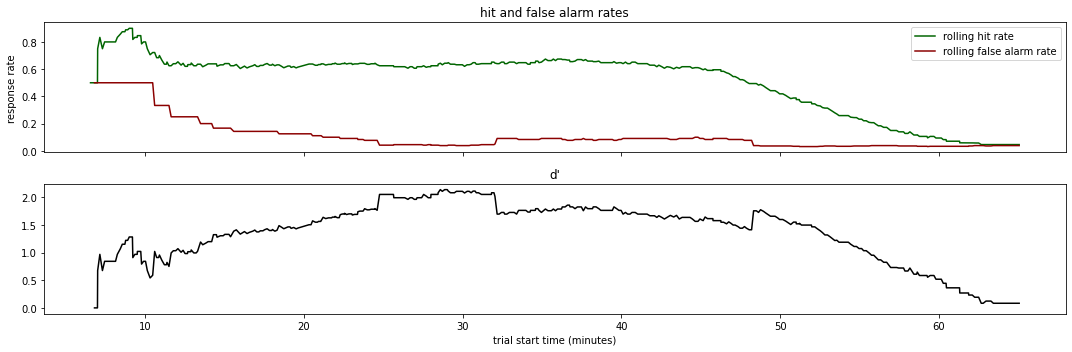

In [16]:
fig, ax = plt.subplots(2, 1, figsize = (15,5), sharex=True)
ax[0].plot(
    trials_df['start_time']/60.,
    trials_df['hit_rate'],
    color='darkgreen'
)

ax[0].plot(
    trials_df['start_time']/60.,
    trials_df['false_alarm_rate'],
    color='darkred'
)

ax[0].legend(['rolling hit rate', 'rolling false alarm rate'])

ax[1].plot(
    trials_df['start_time']/60.,
    trials_df['rolling_dprime'],
    color='black'
)

ax[1].set_xlabel('trial start time (minutes)')
ax[0].set_ylabel('response rate')
ax[0].set_title('hit and false alarm rates')
ax[1].set_title("d'")

fig.tight_layout()

## We can also look at a dataframe of stimulus presentations. This tells us the attributes of every stimulus that was shown in the session

In [17]:
experiment_dataset.stimulus_presentations.head()

,duration,end_frame,image_index,image_name,image_set,index,omitted,start_frame,start_time,stop_time,is_change
stimulus_presentations_id,,,,,,,,,,,
0,0.25025,18002.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,0,False,17987,307.30600,307.55625,False
1,0.25020,18047.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,1,False,18032,308.05663,308.30683,False
2,0.25020,18092.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,2,False,18077,308.80725,309.05745,False
3,0.25024,18137.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,3,False,18122,309.55783,309.80807,False
4,0.25021,18182.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,4,False,18167,310.30847,310.55868,False


#### Also note that there is an image name called 'omitted'. This represents the time that a stimulus would have been shown, had it not been omitted from the regular stimulus cadence. They are included here for ease of analysis, but it's important to note that they are not actually stimuli. They are the lack of expected stimuli.

In [18]:
experiment_dataset.stimulus_presentations.query('image_name == "omitted"').head()

,duration,end_frame,image_index,image_name,image_set,index,omitted,start_frame,start_time,stop_time,is_change
stimulus_presentations_id,,,,,,,,,,,
17,0.25,NaN,8,omitted,omitted,0,True,18751,320.04976,320.29976,False
22,0.25,NaN,8,omitted,omitted,1,True,18976,323.80279,324.05279,False
49,0.25,NaN,8,omitted,omitted,2,True,20191,344.06934,344.31934,False
52,0.25,NaN,8,omitted,omitted,3,True,20326,346.32122,346.57122,False
65,0.25,NaN,8,omitted,omitted,4,True,20911,356.07917,356.32917,False


#### For plotting purposes below, let's add a column that specifies a unique color for every unique image

In [19]:
unique_stimuli = [stimulus for stimulus in experiment_dataset.stimulus_presentations['image_name'].unique() if stimulus != 'omitted']
colormap = {image_name: sns.color_palette()[image_number] for image_number, image_name in enumerate(np.sort(unique_stimuli))}
colormap['omitted'] = np.nan # assign gray to omitted
colormap

{'im061': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'im062': (1.0, 0.4980392156862745, 0.054901960784313725),
 'im063': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'im065': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'im066': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'im069': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'im077': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'im085': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'omitted': nan}

In [20]:
experiment_dataset.stimulus_presentations['color'] = experiment_dataset.stimulus_presentations['image_name'].map(lambda image_name: colormap[image_name])

### There are also dataframes containing running speed, licks, eye tracking, and neural data:

#### running speed
One entry for each read of the analog input line monitoring the encoder voltage, polled at ~60 Hz.

In [21]:
experiment_dataset.running_speed.head()

,timestamps,speed
0,7.27773,0.019115
1,7.29437,0.090604
2,7.31108,0.157861
3,7.32776,0.211029
4,7.34441,0.242318


#### licks
One entry for every detected lick onset time, assigned the time of the corresponding visual stimulus frame.

In [22]:
experiment_dataset.licks.head()

,timestamps,frame
0,7.39446,7
1,7.56129,17
2,8.04500,46
3,8.27854,60
4,8.46202,71


#### eye tracking data
One entry containing ellipse fit parameters for the eye, pupil and corneal reflection for every frame of the eye tracking video stream.

In [23]:
experiment_dataset.eye_tracking.head()

,timestamps,cr_area,eye_area,pupil_area,likely_blink,eye_center_x,eye_center_y,eye_area_raw,eye_height,eye_width,eye_phi,pupil_center_x,pupil_center_y,pupil_area_raw,pupil_height,pupil_width,pupil_phi,cr_center_x,cr_center_y,cr_area_raw,cr_height,cr_width,cr_phi
frame,,,,,,,,,,,,,,,,,,,,,,,
0,0.16496,NaN,NaN,NaN,True,335.194187,180.017065,60454.646749,125.877652,152.873138,-0.006333,NaN,NaN,NaN,NaN,NaN,NaN,327.677353,194.848578,103.134046,5.113249,6.420299,0.488996
1,0.21064,NaN,NaN,NaN,True,335.267887,180.385575,60557.607348,126.119966,152.839282,-0.007400,NaN,NaN,NaN,NaN,NaN,NaN,327.881374,195.016418,102.602893,4.989210,6.546029,0.384647
2,0.21714,NaN,NaN,NaN,True,338.109981,175.343608,60750.458396,127.105948,152.136638,-0.015351,NaN,NaN,NaN,NaN,NaN,NaN,327.429247,191.288934,115.359343,5.792141,6.339627,-0.569084
3,0.25396,NaN,NaN,NaN,True,332.683329,179.640106,60394.607057,125.345601,153.369567,-0.030341,NaN,NaN,NaN,NaN,NaN,NaN,324.181904,195.019464,107.887063,5.504356,6.238971,0.267804
4,0.28652,NaN,NaN,NaN,True,331.211662,179.953735,60277.891351,125.049469,153.435668,-0.043842,NaN,NaN,NaN,NaN,NaN,NaN,323.283362,195.761418,80.164050,4.548921,5.609465,0.058842


#### and deltaF/F values
One row per cell, with each containing an array of deltaF/F values.

In [24]:
experiment_dataset.dff_traces.head()

,cell_roi_id,dff
cell_specimen_id,,
1086492995,1080843802,"[1.0800927877426147, 0.16939789056777954, 0.43..."
1086503617,1080843883,"[0.6288107633590698, 0.1938605010509491, 0.271..."
1086493239,1080843919,"[0.08208392560482025, 0.2809079885482788, 0.42..."
1086493301,1080843954,"[0.2924543023109436, 0.6212688684463501, 0.189..."
1086497146,1080843992,"[1.0083428621292114, 0.45849329233169556, 0.71..."


#### we can convert the dff_traces to long-form (aka "tidy") as follows:

In [25]:
def get_cell_timeseries_dict(dataset, cell_specimen_id):
    '''
    for a given cell_specimen ID, this function creates a dictionary with the following keys
    * timestamps: ophys timestamps
    * cell_roi_id
    * cell_specimen_id
    * dff
    This is useful for generating a tidy dataframe
    arguments:
        session object
        cell_specimen_id
    returns
        dict
    '''
    cell_dict = {
        'timestamps': dataset.ophys_timestamps,
        'cell_roi_id': [dataset.dff_traces.loc[cell_specimen_id]['cell_roi_id']] * len(dataset.ophys_timestamps),
        'cell_specimen_id': [cell_specimen_id] * len(dataset.ophys_timestamps),
        'dff': dataset.dff_traces.loc[cell_specimen_id]['dff'],

    }
    return cell_dict

experiment_dataset.tidy_dff_traces = pd.concat(
    [pd.DataFrame(get_cell_timeseries_dict(experiment_dataset, cell_specimen_id)) for cell_specimen_id in experiment_dataset.dff_traces.reset_index()['cell_specimen_id']]
).reset_index(drop=True)

experiment_dataset.tidy_dff_traces.sample(5)

,timestamps,cell_roi_id,cell_specimen_id,dff
712410,3400.78333,1080844418,1086494309,0.014557
413330,2528.37764,1080844188,1086493757,-0.079185
618527,3652.00199,1080844328,1086494044,-0.075574
816630,4113.86104,1080844470,1086494457,0.146398
251221,919.68624,1080844058,1086493458,0.204463


### We can look at a few trials in some detail
#### First define a function to plot a number of data streams
* each stimulus as a colored vertical bar
* running speed
* licks/rewards
* pupil area
* neural responses (dF/F)

In [26]:
def plot_stimuli(trial, ax):
    '''
    plot stimuli as colored bars on specified axis
    '''
    stimuli = experiment_dataset.stimulus_presentations.query('stop_time >= {} and start_time <= {} and not omitted'.format(float(trial['start_time']), float(trial['stop_time'])))
    for idx, stimulus in stimuli.iterrows():
        ax.axvspan(stimulus['start_time'], stimulus['stop_time'], color=stimulus['color'], alpha=0.5)

        
def plot_running(trial, ax):
    '''
    plot running speed for trial on specified axes
    '''
    trial_running_speed = experiment_dataset.running_speed.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    ax.plot(
        trial_running_speed['timestamps'],
        trial_running_speed['speed'],
        color='black'
    )
    ax.set_title('running speed')
    ax.set_ylabel('speed (cm/s)')
    

def plot_licks(trial, ax):
    '''
    plot licks as black dots on specified axis
    '''
    trial_licks = experiment_dataset.licks.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    ax.plot(
        trial_licks['timestamps'],
        np.zeros_like(trial_licks['timestamps']),
        marker = 'o',
        linestyle = 'none',
        color='black'
    )
    

def plot_rewards(trial, ax):
    '''
    plot rewards as blue diamonds on specified axis
    '''
    trial_rewards = experiment_dataset.rewards.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    ax.plot(
        trial_rewards['timestamps'],
        np.zeros_like(trial_rewards['timestamps']),
        marker = 'd',
        linestyle = 'none',
        color='blue',
        markersize = 10,
        alpha = 0.25
    )
    
def plot_pupil(trial, ax):
    '''
    plot pupil area on specified axis
    '''
    trial_eye_tracking = experiment_dataset.eye_tracking.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    ax.plot(
        trial_eye_tracking['timestamps'],
        trial_eye_tracking['pupil_area'],
        color='black'
    )
    ax.set_title('pupil area')
    ax.set_ylabel('pupil area\n$(pixels^2)$')
    

def plot_dff(trial, ax):
    '''
    plot each cell's dff response for a given trial
    '''
    trial_dff_traces = experiment_dataset.tidy_dff_traces.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    for cell_specimen_id in experiment_dataset.tidy_dff_traces['cell_specimen_id'].unique():
        ax.plot(
            trial_dff_traces.query('cell_specimen_id == @cell_specimen_id')['timestamps'],
            trial_dff_traces.query('cell_specimen_id == @cell_specimen_id')['dff']
        )
        ax.set_title('deltaF/F responses')
        ax.set_ylabel('dF/F')
    
def make_trial_plot(trial):
    '''
    combine all plots for a given trial
    '''
    fig, axes = plt.subplots(4, 1, figsize = (15, 8), sharex=True)

    for ax in axes:
        plot_stimuli(trial, ax)
            
    plot_running(trial, axes[0])

    plot_licks(trial, axes[1])
    plot_rewards(trial, axes[1])
    
    axes[1].set_title('licks and rewards')
    axes[1].set_yticks([])
    axes[1].legend(['licks','rewards'])

    plot_pupil(trial, axes[2])

    plot_dff(trial, axes[3])
    
    axes[3].set_xlabel('time in session (seconds)')
    fig.tight_layout()
    return fig, axes

### here is a hit trial
Notes:
* The image identity changed just after t = 2361 seconds (note the color change in the vertical spans)
* The animal was running steadily prior to the image change, then slowed to a stop after the change
* The first lick occured about 500 ms after the change, and triggered an immediate reward
* The pupil area shows some missing data - these were points that were filtered out as outliers.
* There appears to be one neuron that was responding regularly to the stimulus prior to the change. 

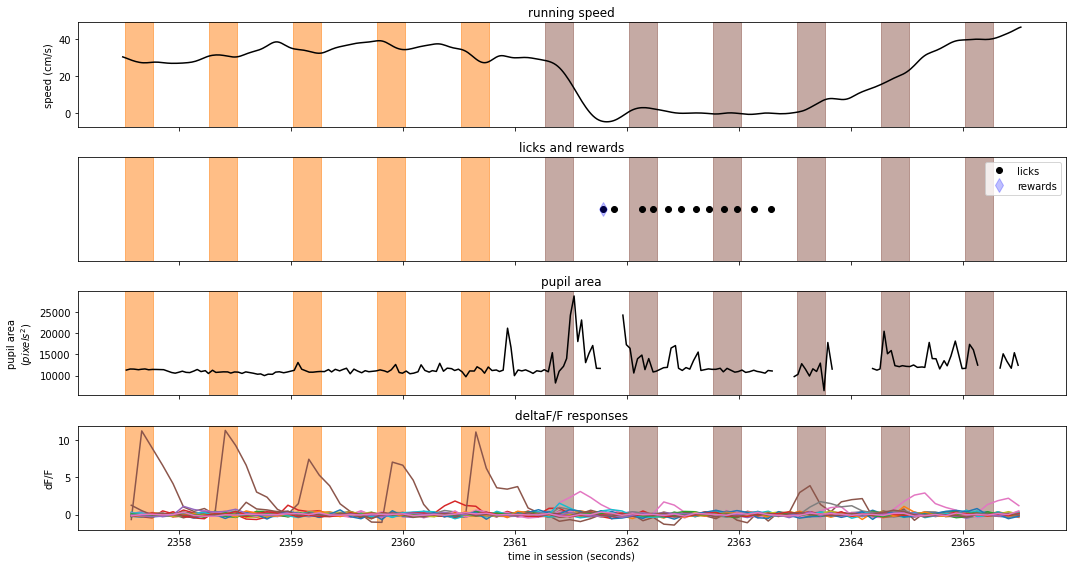

In [27]:
trial = experiment_dataset.trials.query('hit').sample(random_state = 1)
fig, axes = make_trial_plot(trial)

### here is a miss trial
Notes:
* The image identity changed just after t = 824 seconds (note the color change in the vertical spans)
* The animal was running relatively steadily during the entire trial and did not slow after the stimulus identity change
* There were no licks or rewards on this trial
* The pupil area shows some missing data - these were points that were filtered out as outliers.
* One neuron had a large response just prior to the change, but none appear to be stimulus locked on this trial

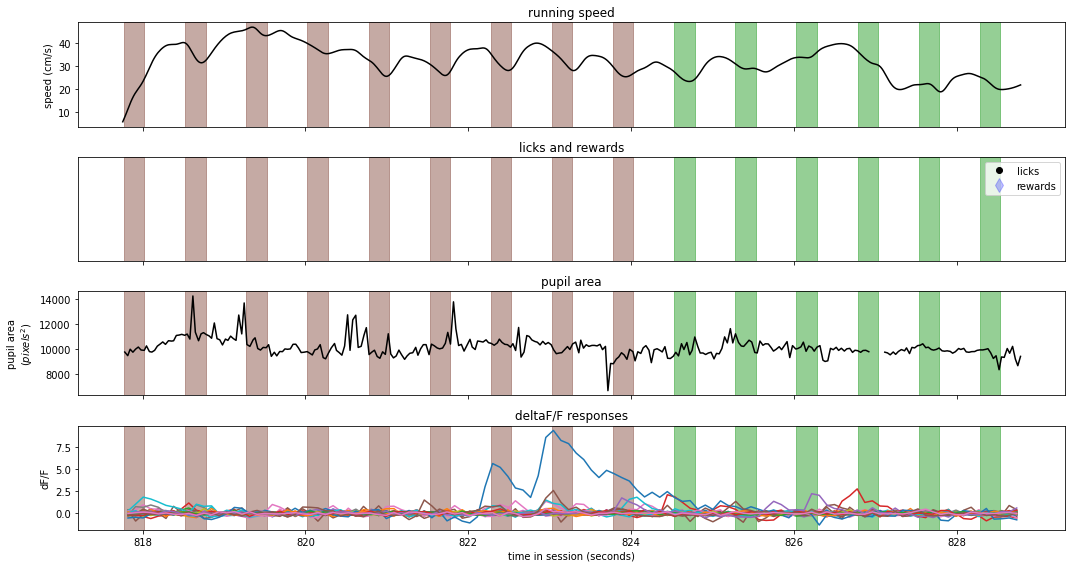

In [28]:
trial = experiment_dataset.trials.query('miss').sample(random_state = 2)
fig, axes = make_trial_plot(trial)

### here is a false alarm trial
Notes:
* The image identity was consistent during the entire trial
* The animal slowed and licked partway through the trial
* There were no rewards on this trial
* The pupil area shows some missing data - these were points that were filtered out as outliers.
* There were not any neurons with obvious stimulus locked responses

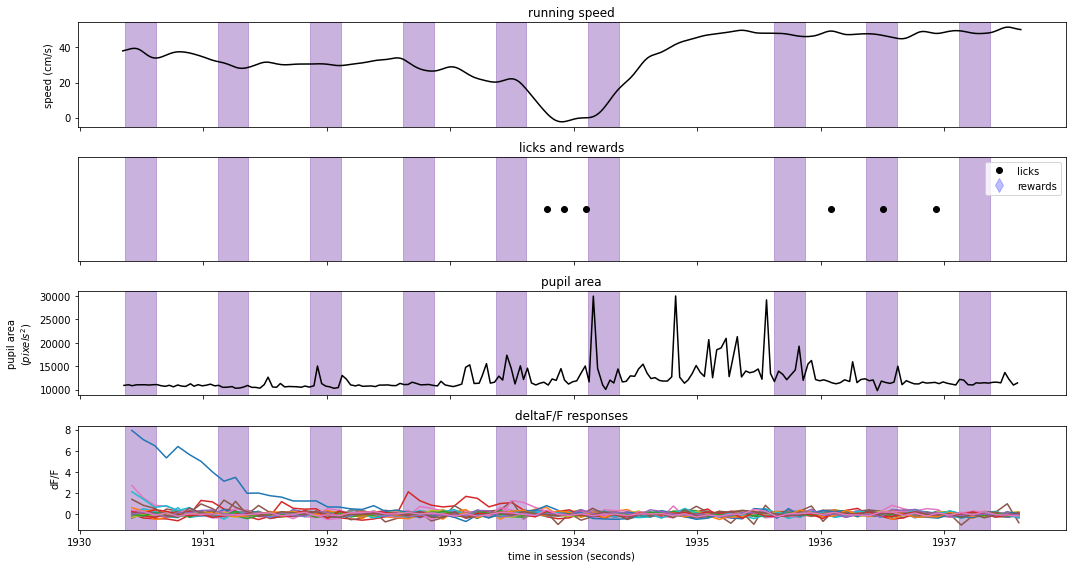

In [29]:
trial = experiment_dataset.trials.query('false_alarm').sample(random_state = 2)
fig, axes = make_trial_plot(trial)

### And finally, a correct rejection
Notes:
* The image identity was consistent during the entire trial
* The animal did not slow or lick during this trial
* There were no rewards on this trial

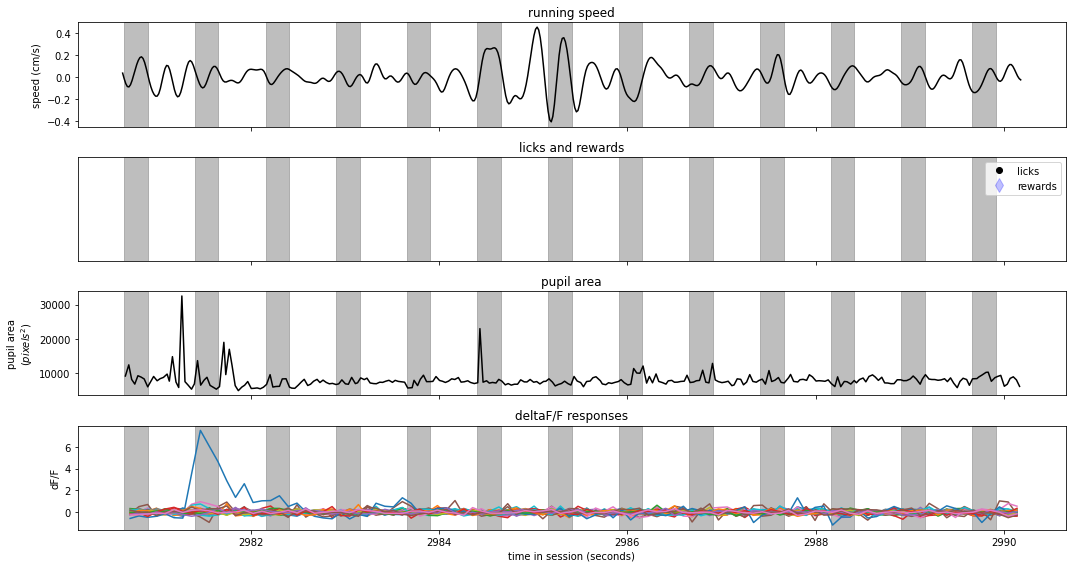

In [30]:
trial = experiment_dataset.trials.query('correct_reject').sample(random_state = 10)
fig, axes = make_trial_plot(trial)